In [1]:
#importing library
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers

In [2]:
#loading the dataset
df=pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [3]:
#getting the information about row and columns
df.shape

(9879, 40)

In [4]:
df=df.drop('gameId',axis=1)

In [5]:
df.shape

(9879, 39)

<AxesSubplot:>

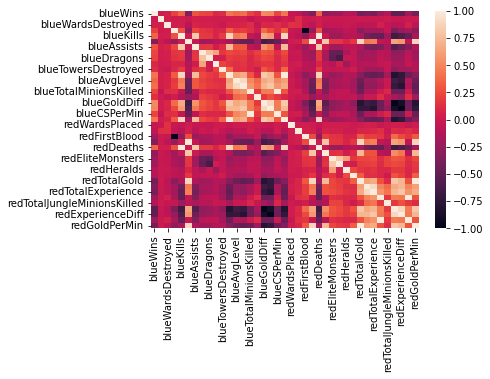

In [6]:
#creating the heatmap
sns.heatmap(df.corr())

In [7]:
#shufffling the data with pandas 
df=df.sample(frac=1).reset_index(drop=True)


In [8]:
#data
Y=df['blueWins']
Y

0       1
1       1
2       0
3       1
4       1
       ..
9874    0
9875    0
9876    0
9877    0
9878    0
Name: blueWins, Length: 9879, dtype: int64

In [9]:
#droping the label column
X=df.drop('blueWins',axis=1)
X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,37,4,0,8,3,8,0,0,0,0,...,0,15449,6.4,16493,190,52,-1447,-2623,19.0,1544.9
1,17,0,0,8,7,9,0,0,0,0,...,0,16316,7.2,18407,203,56,-2277,-1630,20.3,1631.6
2,16,3,0,6,9,6,1,1,0,0,...,0,17613,7.0,19389,211,48,959,1002,21.1,1761.3
3,14,2,1,3,4,4,0,0,0,0,...,0,16749,7.0,18938,271,60,624,-1141,27.1,1674.9
4,20,4,1,10,6,15,2,1,1,1,...,1,16600,6.6,16906,214,40,-3290,-1398,21.4,1660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,14,0,0,6,7,9,0,0,0,0,...,0,17836,7.2,19691,248,60,1776,3265,24.8,1783.6
9875,44,5,1,4,2,7,1,1,0,0,...,0,15796,6.8,18158,257,55,352,-176,25.7,1579.6
9876,38,2,1,5,5,4,1,0,1,0,...,0,16844,7.0,18407,230,69,1335,1142,23.0,1684.4
9877,13,3,0,6,9,3,0,0,0,0,...,0,17513,7.0,18829,233,36,2115,1147,23.3,1751.3


<AxesSubplot:>

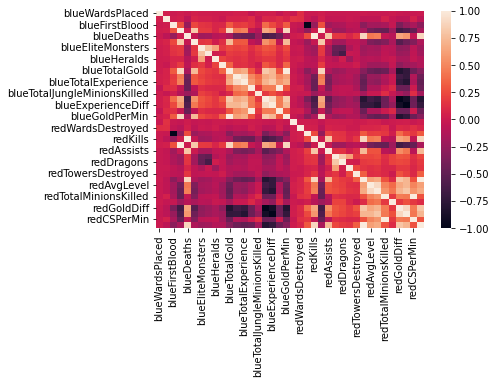

In [10]:
sns.heatmap(X.corr())

In [11]:
#spliting the data into train and test
train_test_split=0.7
num_examples=X.shape[0]
num_train_examples=int(np.floor(num_examples*train_test_split))
num_test_examples=int(np.floor(num_examples-num_train_examples))
print(num_examples)
print(num_train_examples)
print(num_test_examples)
print(num_train_examples+num_test_examples)

9879
6915
2964
9879


In [12]:
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [13]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [14]:
model.compile(
    optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'], loss_weights=None,
    weighted_metrics=None, run_eagerly=None, steps_per_execution=None
)

In [15]:
x_train=X.iloc[0:num_train_examples,:]
y_train=Y.iloc[0:num_train_examples]
x_test=X.iloc[num_train_examples:num_examples,:]
y_test=Y.iloc[num_train_examples:num_examples]

In [16]:
print(x_train.shape)

(6915, 38)


In [17]:
print(x_test.shape)

(2964, 38)


In [18]:
batch_size=32
epochs=300

In [19]:
model.fit(
    x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose='auto',
    callbacks=None, validation_split=0.2, validation_data=None, shuffle=True
    
)

2021-12-28 12:30:09.788788: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
173/173 [==============================] - 1s 4ms/step - loss: 154.5507 - accuracy: 0.6466 - val_loss: 12.1462 - val_accuracy: 0.6652
Epoch 2/300
173/173 [==============================] - 0s 3ms/step - loss: 17.6165 - accuracy: 0.6414 - val_loss: 10.1057 - val_accuracy: 0.7173
Epoch 3/300
173/173 [==============================] - 0s 3ms/step - loss: 15.3024 - accuracy: 0.6564 - val_loss: 7.2852 - val_accuracy: 0.7310
Epoch 4/300
173/173 [==============================] - 0s 3ms/step - loss: 13.3912 - accuracy: 0.6441 - val_loss: 10.7222 - val_accuracy: 0.5871
Epoch 5/300
173/173 [==============================] - 0s 3ms/step - loss: 11.0631 - accuracy: 0.6509 - val_loss: 11.3711 - val_accuracy: 0.7274
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 11.6301 - accuracy: 0.6479 - val_loss: 14.4149 - val_accuracy: 0.6161
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 14.1319 - accuracy: 0.6502 - val_loss: 9.4355 - val_acc

In [20]:
loss,accuracy=model.evaluate(x_test,y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.6650
